In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [6]:
def read_data():
    train = pd.read_csv('data/train.csv')
    fulfilment_center_info = pd.read_csv('data/fulfilment_center_info.csv')
    meal = pd.read_csv('data/meal_info.csv')
    data_train_center_merge = pd.merge(train,fulfilment_center_info,on='center_id')
    data = pd.merge(data_train_center_merge,meal,on='meal_id')
    return data


data = read_data()

In [7]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


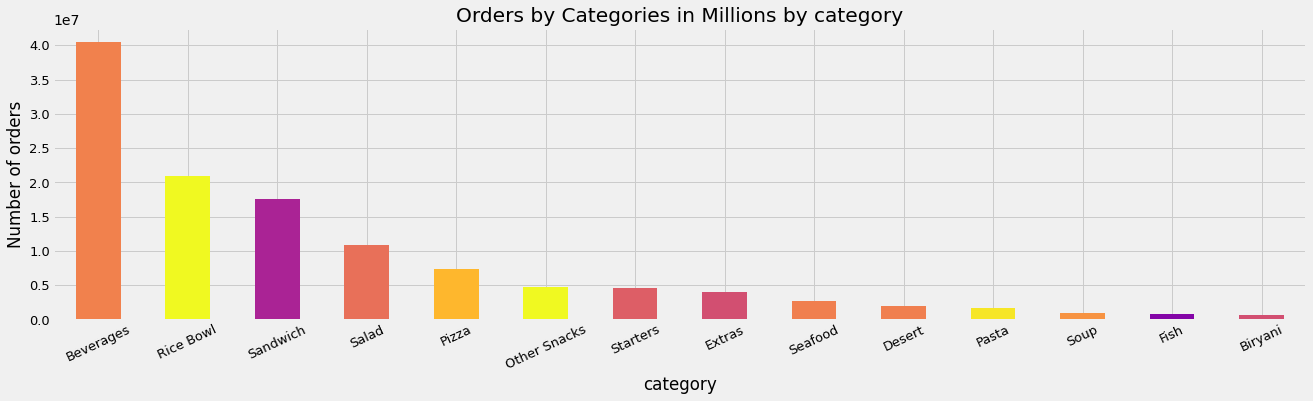

In [48]:
plt.style.use('fivethirtyeight')

my_cmap = plt.get_cmap('plasma')
plot_kwargs = {
    "figsize": (20, 5),
    "fontsize": 13,
    'color': my_cmap(data.num_orders),
}
data.groupby(["category"])["num_orders"].sum().sort_values(ascending=False).plot.bar(**plot_kwargs)
plt.ylabel("Number of orders")
plt.title("Orders by Categories in Millions by category")
plt.xticks(rotation=25)
plt.show()